## Time Series Anomaly Detection

### Table of Contents
* [Section 1: What Are Anomalies in a Time Series?](#section1)
* [Section 2: Simple Moving Average](#section2)
* [Section 3: Exponential Moving Average](#section3)
* [Section 4: Seasonal-Trend Decomposition](#section4)
* [Section 5: Facebook's Prophet](#section5)
* [Section 6: RNN/LSTM/GRU](#section6)



Reading:
* [Forecasting at Scale](https://peerj.com/preprints/3190.pdf)
* Bike share daily count: [data](https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike-sharing-daily.csv)

### (1) What Are Anomalies in a Time Series?

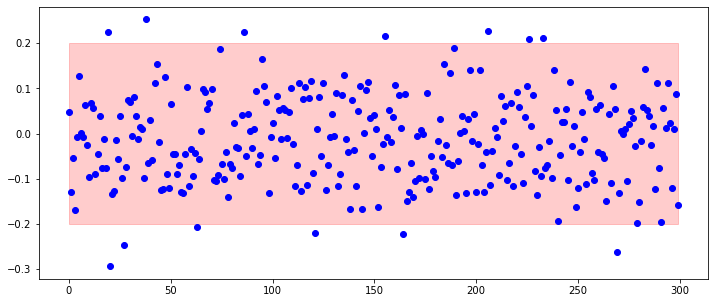

In [1]:
# Generate the data
import numpy as np
import matplotlib.pyplot as plt 

# A time series
mu, sigma = 0, 0.1 # mean and standard deviation
obs = 300
plt.figure(figsize=[12, 5])
plt.plot(np.random.normal(mu, sigma, obs), marker = 'o',linestyle='', color='b')
plt.fill_between(np.arange(obs), -2*sigma, 2*sigma, alpha=0.2, color="r", label="Predicted interval")
plt.show()

Cautions:
- Model patterns as noises
- Model noises as patterns

### (2) Simple Moving Average

In [2]:
import pandas as pd
import seaborn as sns
bike = pd.read_csv('/bike-sharing-daily.csv')
bike = bike[['dteday','cnt']]
bike.columns = ['ds','y']
bike.tail()

ds     y
726  2012-12-27  2114
727  2012-12-28  3095
728  2012-12-29  1341
729  2012-12-30  1796
730  2012-12-31  2729

<AxesSubplot:>

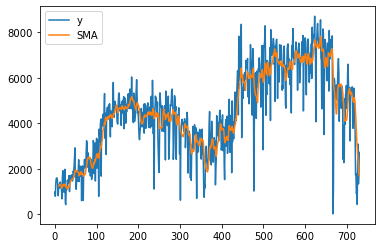

In [3]:
bike['SMA'] = bike.iloc[:,1].rolling(window=10).mean()
bike['diff'] = bike['y'] - bike['SMA']
bike[['y','SMA']].plot()

Text(0.5, 1.0, 'The distribution of diff')

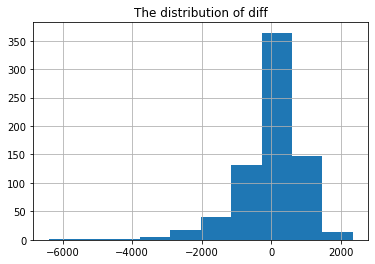

In [4]:
bike['diff'].hist()
plt.title('The distribution of diff')

In [5]:
bike['upper'] = bike['SMA'] + 2000
bike['lower'] = bike['SMA'] - 2000
bike[10:20]

ds     y     SMA   diff   upper  lower
10  2011-01-11  1263  1279.3  -16.3  3279.3 -720.7
11  2011-01-12  1162  1315.4 -153.4  3315.4 -684.6
12  2011-01-13  1406  1321.1   84.9  3321.1 -678.9
13  2011-01-14  1421  1307.0  114.0  3307.0 -693.0
14  2011-01-15  1248  1271.8  -23.8  3271.8 -728.2
15  2011-01-16  1204  1231.6  -27.6  3231.6 -768.4
16  2011-01-17  1000  1180.6 -180.6  3180.6 -819.4
17  2011-01-18   683  1153.0 -470.0  3153.0 -847.0
18  2011-01-19  1650  1235.8  414.2  3235.8 -764.2
19  2011-01-20  1927  1296.4  630.6  3296.4 -703.6

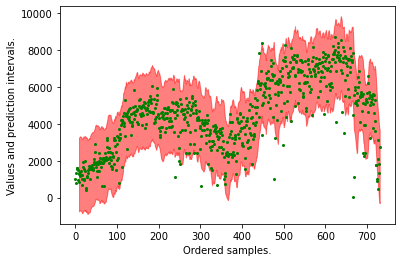

In [6]:
def plot_it():
    plt.plot(bike['y'],'go',markersize=2,label='Actual')
    plt.fill_between(
       np.arange(bike.shape[0]), bike['lower'], bike['upper'], alpha=0.5, color="r",
       label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    plt.show()
    
plot_it()

### (3) Exponential Smoothing

/Users/chriskuo/opt/anaconda3/envs/AD/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

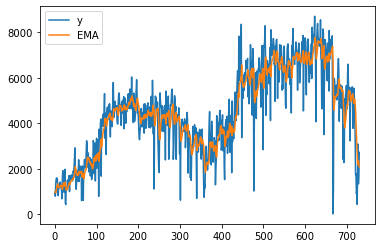

In [7]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
bike = pd.read_csv('/bike-sharing-daily.csv')
bike = bike[['dteday','cnt']]
bike.columns = ['ds','y']

EMAfit = SimpleExpSmoothing(bike['y']).fit(smoothing_level=0.2,optimized=False)
EMA = EMAfit.forecast(3).rename(r'$\alpha=0.2$')
bike['EMA'] = EMAfit.predict(start = 0)
bike['diff'] = bike['y'] - bike['EMA']
bike[['y','EMA']].plot()

Text(0.5, 1.0, 'The distribution of diff')

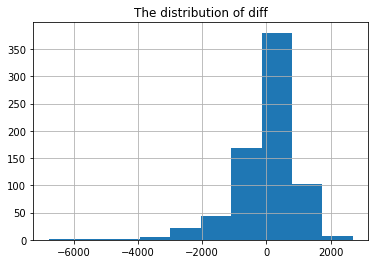

In [8]:
bike['diff'].hist()
plt.title('The distribution of diff')

In [9]:
bike['upper'] = bike['EMA'] + 2000
bike['lower'] = bike['EMA'] - 2000
bike[10:20]

ds     y          EMA        diff        upper       lower
10  2011-01-11  1263  1207.073629   55.926371  3207.073629 -792.926371
11  2011-01-12  1162  1218.258903  -56.258903  3218.258903 -781.741097
12  2011-01-13  1406  1207.007122  198.992878  3207.007122 -792.992878
13  2011-01-14  1421  1246.805698  174.194302  3246.805698 -753.194302
14  2011-01-15  1248  1281.644558  -33.644558  3281.644558 -718.355442
15  2011-01-16  1204  1274.915647  -70.915647  3274.915647 -725.084353
16  2011-01-17  1000  1260.732517 -260.732517  3260.732517 -739.267483
17  2011-01-18   683  1208.586014 -525.586014  3208.586014 -791.413986
18  2011-01-19  1650  1103.468811  546.531189  3103.468811 -896.531189
19  2011-01-20  1927  1212.775049  714.224951  3212.775049 -787.224951

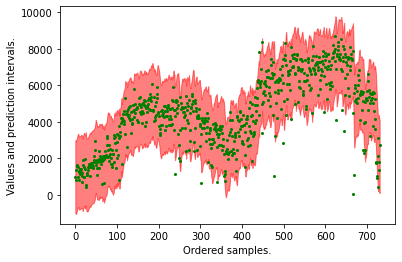

In [10]:
plot_it()

### (4) Seasonal-Trend Decomposition

<AxesSubplot:xlabel='ds'>

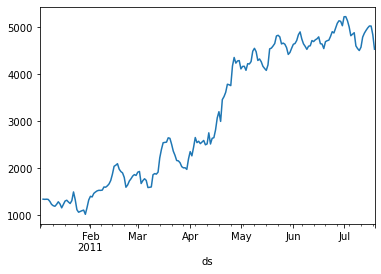

In [11]:
import pandas as pd
import statsmodels.api as sm

bike = pd.read_csv('/Users/chriskuo/Downloads/bike-sharing-daily.csv')
bike = bike[['dteday','cnt']]
bike.columns = ['ds','y']
bike = bike.reset_index(drop='index') #inplace=True)
bike.index = pd.to_datetime(bike['ds'])

result = sm.tsa.seasonal_decompose(bike['y'], model='additive')
result.trend[1:200].plot()

<AxesSubplot:xlabel='ds'>

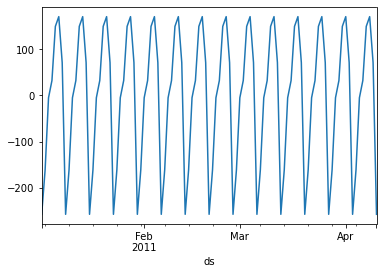

In [12]:
result.seasonal[1:100].plot()

<AxesSubplot:xlabel='ds'>

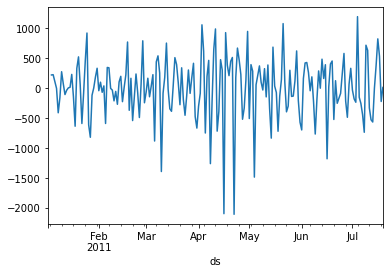

In [13]:
result.resid[1:200].plot()

<AxesSubplot:xlabel='ds'>

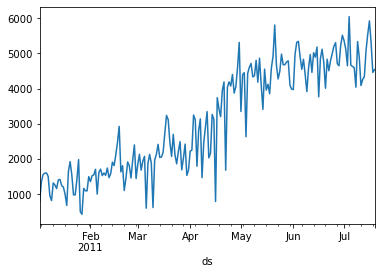

In [14]:
result.observed[1:200].plot()

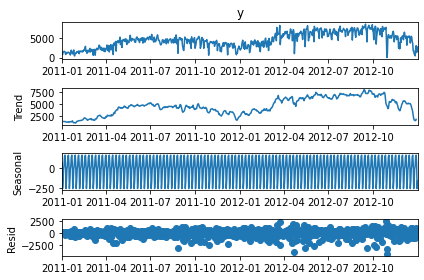

In [15]:
result.plot()
plt.show()

### (5) Facebook's Prophet

In [16]:
# !pip install fbprophet
# Or use "conda install -c conda-forge/label/cf202003 fbprophet"
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

# Fitting with default parameters
bike_model_0 = Prophet()
bike_model_0.fit(bike)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future= bike_model_0.make_future_dataframe(periods=20, freq='d')
future.tail()

ds
746 2013-01-16
747 2013-01-17
748 2013-01-18
749 2013-01-19
750 2013-01-20

In [18]:
bike_model_0_data=bike_model_0.predict(future)
bike_model_0_data.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
746 2013-01-16  6527.014688  4054.711803  6572.454828  6526.492808   
747 2013-01-17  6531.509249  4151.601566  6744.553025  6530.901776   
748 2013-01-18  6536.003811  4172.911945  6830.265774  6535.323299   
749 2013-01-19  6540.498372  4275.673915  6656.191526  6539.738055   
750 2013-01-20  6544.992933  3820.426527  6364.333751  6544.168654   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
746  6527.512963    -1206.349488          -1206.349488          -1206.349488   
747  6532.090603    -1051.639978          -1051.639978          -1051.639978   
748  6536.646435    -1000.474745          -1000.474745          -1000.474745   
749  6541.226552    -1075.576369          -1075.576369          -1075.576369   
750  6545.814710    -1384.684733          -1384.684733          -1384.684733   

         weekly  weekly_lower  weekly_upper       yearly  yearly_lower  \
746   35.756927     35.756927     35.756927 -1242.106414  -1242.106414   
747  149.082612    149.082612    149.082612 -1200.722589  -1200.722589   
748  166.729478    166.729478    166.729478 -1167.204223  -1167.204223   
749   65.753319     65.753319     65.753319 -1141.329688  -1141.329688   
750 -261.966081   -261.966081   -261.966081 -1122.718652  -1122.718652   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
746  -1242.106414                   0.0                         0.0   
747  -1200.722589                   0.0                         0.0   
748  -1167.204223                   0.0                         0.0   
749  -1141.329688                   0.0                         0.0   
750  -1122.718652                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
746                         0.0  5320.665200  
747                         0.0  5479.869272  
748                         0.0  5535.529065  
749                         0.0  5464.922003  
750                         0.0  5160.308200

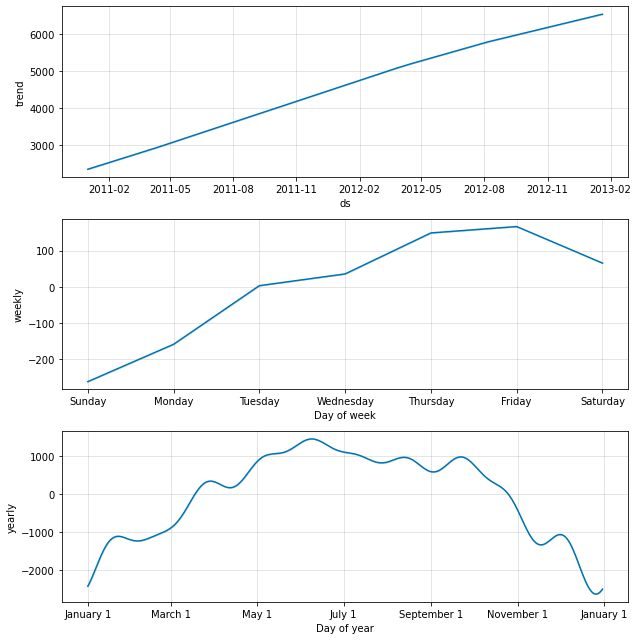

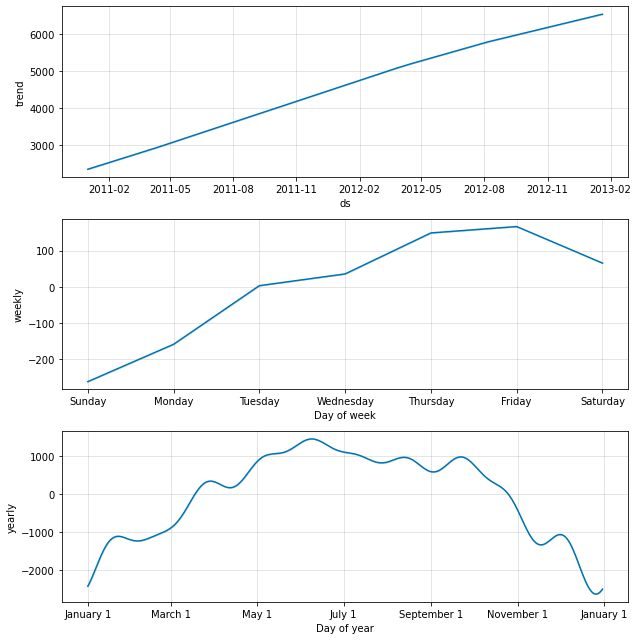

In [19]:
bike_model_0.plot_components(bike_model_0_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


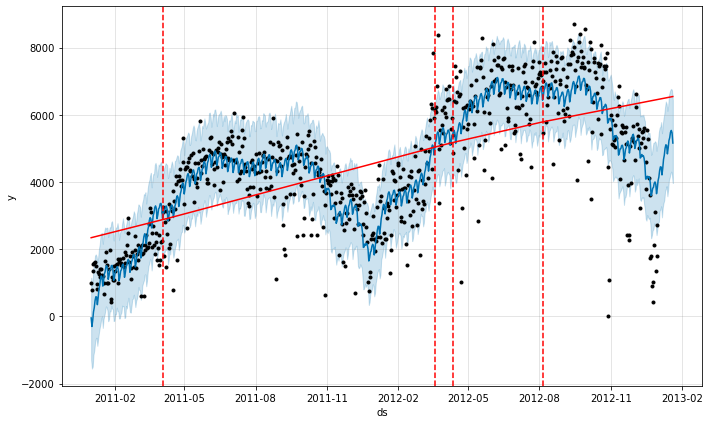

In [20]:
from fbprophet.plot import add_changepoints_to_plot
bike_model_0 = Prophet(#n_changepoints=20, 
                  #yearly_seasonality=True, 
                  #changepoint_prior_scale=0.05
                   )
forecast = bike_model_0.fit(bike).predict(future)
fig= bike_model_0.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), bike_model_0, forecast)

In [21]:
#bike_model_0.plot_components(bike_model_0_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


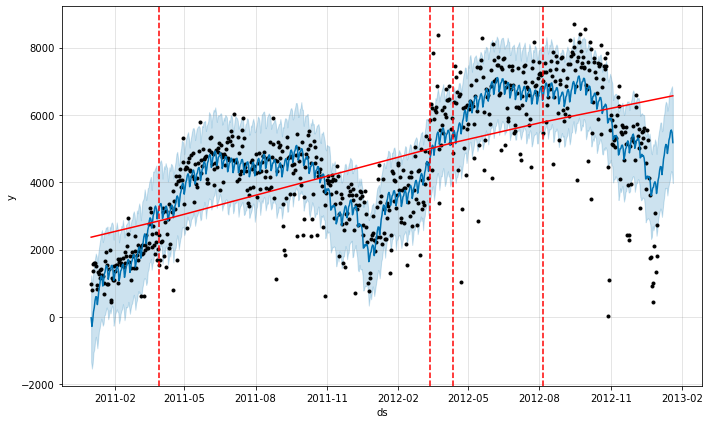

In [22]:
bike_model_2 = Prophet(n_changepoints=20, 
                  yearly_seasonality=True, 
                  changepoint_prior_scale=0.05
                   )
forecast = bike_model_2.fit(bike).predict(future)
fig= bike_model_2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), bike_model_2, forecast)

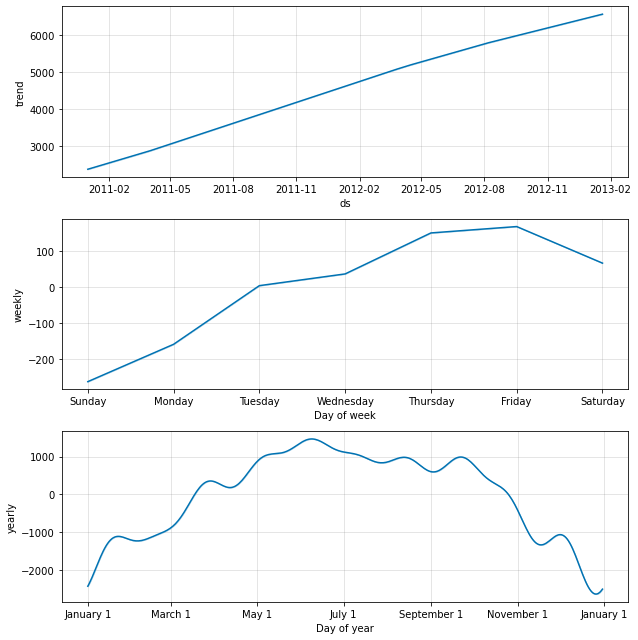

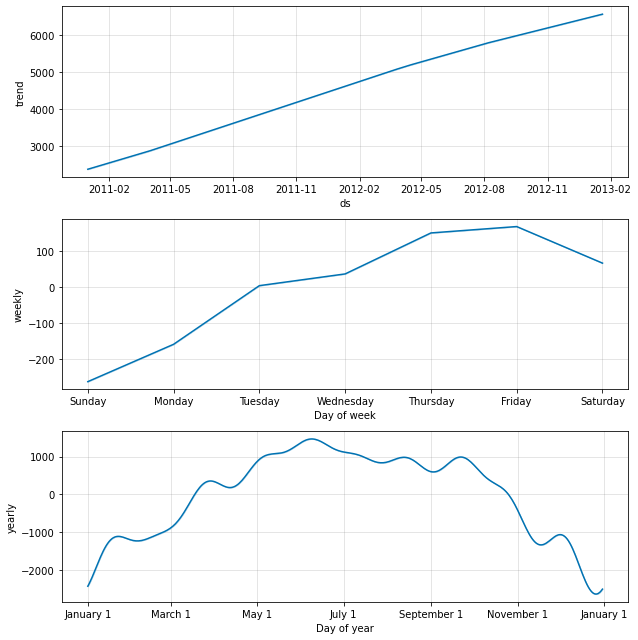

In [23]:
bike_model_2.plot_components(forecast)

In [24]:
# Python
from fbprophet.diagnostics import cross_validation
bike_0_cv = cross_validation(bike_model_0, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
bike_0_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2011-07-05 00:00:00 and 2012-01-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2011-07-06  5208.518754  4575.528708  5876.603174  4629 2011-07-05
1 2011-07-07  5340.512102  4696.919150  5980.313361  4592 2011-07-05
2 2011-07-08  5390.212090  4760.319050  6035.502602  4040 2011-07-05
3 2011-07-09  5361.184671  4725.984421  6002.938935  5336 2011-07-05
4 2011-07-10  5284.129165  4674.235427  5959.576658  4881 2011-07-05

In [25]:
# Python
from fbprophet.diagnostics import cross_validation
bike_2_cv = cross_validation(bike_model_2, 
                         initial='100 days', 
                         period='180 days', 
                         horizon = '365 days')
bike_2_cv.head()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2011-07-05 00:00:00 and 2012-01-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2011-07-06  5210.383420  4548.358702  5905.922017  4629 2011-07-05
1 2011-07-07  5342.428398  4753.466462  5994.075191  4592 2011-07-05
2 2011-07-08  5392.380155  4767.049257  6037.602241  4040 2011-07-05
3 2011-07-09  5363.770334  4714.966489  6007.794396  5336 2011-07-05
4 2011-07-10  5287.271685  4638.253632  5963.267559  4881 2011-07-05

In [26]:
bike_2_cv.tail()

ds         yhat   yhat_lower   yhat_upper     y     cutoff
725 2012-12-27  3055.927728  2161.944274  3930.253304  2114 2012-01-01
726 2012-12-28  3160.926357  2307.121911  4033.525905  3095 2012-01-01
727 2012-12-29  3058.353384  2168.606563  3907.031914  1341 2012-01-01
728 2012-12-30  3020.887653  2137.459839  3915.562255  1796 2012-01-01
729 2012-12-31  3051.149549  2123.951884  3925.701938  2729 2012-01-01

In [27]:
# Python
from fbprophet.diagnostics import performance_metrics
bike_0_p = performance_metrics(bike_0_cv)
bike_0_p.head()

horizon           mse         rmse          mae      mape     mdape  \
0 37 days  1.328324e+06  1152.529568   973.011769  0.256159  0.237918   
1 38 days  1.336529e+06  1156.083670   980.488855  0.257760  0.237918   
2 39 days  1.383297e+06  1176.136361  1004.985708  0.263612  0.280983   
3 40 days  1.434102e+06  1197.539998  1028.200233  0.269068  0.286072   
4 41 days  1.435550e+06  1198.144593  1032.303397  0.270873  0.286072   

   coverage  
0  0.356164  
1  0.349315  
2  0.335616  
3  0.321918  
4  0.321918

In [28]:
# Python
from fbprophet.diagnostics import performance_metrics
bike_2_p = performance_metrics(bike_2_cv)
bike_2_p.head()

horizon           mse         rmse          mae      mape     mdape  \
0 37 days  1.457045e+06  1207.081305  1023.938769  0.270616  0.282376   
1 38 days  1.466772e+06  1211.103740  1032.904903  0.272785  0.282376   
2 39 days  1.517169e+06  1231.734081  1057.852766  0.278567  0.282752   
3 40 days  1.569687e+06  1252.871543  1081.442222  0.284005  0.291329   
4 41 days  1.565715e+06  1251.285512  1082.616348  0.284709  0.291329   

   coverage  
0  0.383562  
1  0.376712  
2  0.363014  
3  0.349315  
4  0.349315

### (6) RNN/LSTM/GRU


Read the article [A Technical Guide on RNN/LSTM/GRU for Stock Price Prediction](https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346)